#  ``aggregate``: Reinsurance Credit Risk Examples

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [12]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

# Percentiles of Aggregates vs. Component Parts

In [176]:
N = 100
uw.update = False
port = uw(f'''port test
    agg compound    {N} claim sev dhistogram xps [1 2 4] [0.5 0.25 0.25] poisson
    agg fixsev      {N} claim sev dhistogram xps [2] [1] poisson
    agg fixcount    {N} claim sev dhistogram xps [1 2 4] [0.5 0.25 0.25] fixed''')

#     agg poi50 50 claim sev dhistogram xps [1] [1] poisson
#     agg poi100 100 claim sev dhistogram xps [1] [1] poisson''')

In [177]:
port.update(10, 1, remove_fuzz=True, add_exa=False, approx_freq_ge=1000, padding=1)

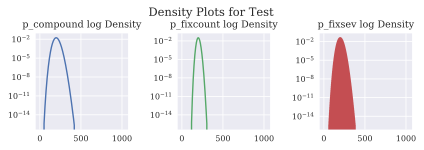

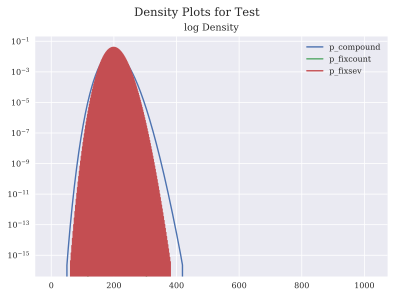

In [178]:
port.plot(line=port.line_names, logy=True, subplots=True)
port.plot(line=port.line_names, logy=True, aspect=1.4, height=4)

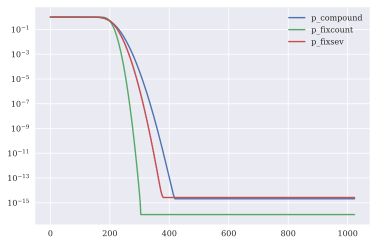

In [181]:
temp = 1 - port.density_df.filter(regex='p_[cfp]').sort_index(axis=1).cumsum()
temp.plot(logy=True)

In [158]:
port

,compound,fixcount,fixsev,total
"(freq, mean)",50,50,50,150
"(freq, cv)",0.141421,0,0.141421,0.0666667
"(freq, skew)",0.141421,NaN,0.141421,0.1
"(sev, mean)",2,2,2,2
"(sev, cv)",0.612372,0.612372,0,0.5
"(sev, skew)",0.816497,0.816497,NaN,1
"(agg, mean)",100,100,100,300
"(agg, cv)",0.165831,0.0866025,0.141421,0.0781736
"(agg, skew)",0.202835,0.11547,0.141421,0.108539
Mean,100,100,100,300


In [187]:
uw = agg.Underwriter()
uw.update = False 
port = uw('''port MyTest
    agg Auto 5000 claims  sev lognorm 10000 cv 2 mixed gamma 0.15
    agg Cat 1.7 claims sev 1e6 * pareto 1.5 - 1e6 poisson''')

port.update(16, 5000, add_exa=False, remove_fuzz=True, padding=2, approx_freq_ge=10000)

port.plot(subplots=True, logy=True)

port.q(0.995)